#   Найти данные для классификации. 
#   Предобработать данные, если это необходимо.

In [342]:
import pandas as pd

data = pd.read_csv('../Datasets_for_work/Data_5/milknew.csv')
data

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [343]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [344]:
target = pd.DataFrame()
# data['Grade'].replace(['low', 'medium', 'high'], [0,1,2], inplace=True)
target['Grade'] = data['Grade']
target['Grade'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace=True)
new_data = data.drop(columns=['Grade'])
target

,Grade
0,2
1,2
2,0
3,0
4,1
...,...
1054,1
1055,2
1056,0
1057,2


# Изобразить гистограмму, которая показывает баланс классов. 
# Сделать выводы

C:\Users\filip\AppData\Local\Temp\ipykernel_7256\462323154.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


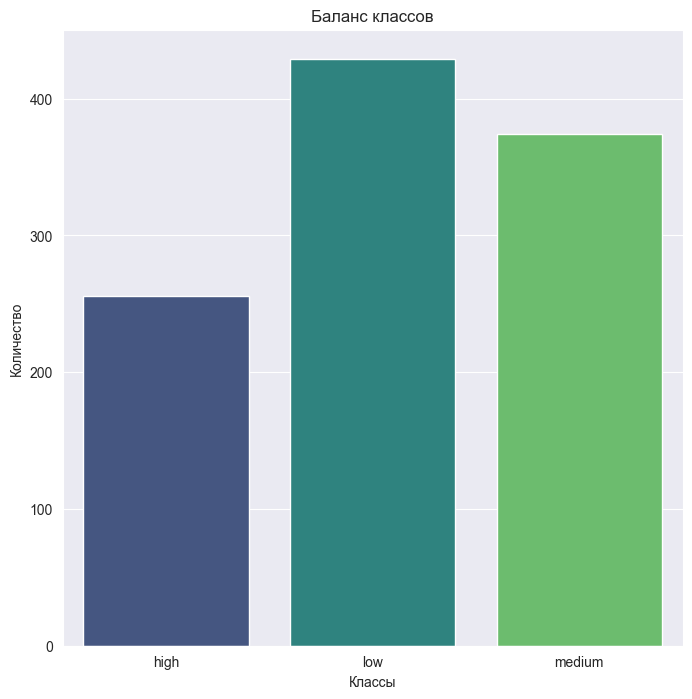

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

sns.countplot(x='Grade', data=data, palette='viridis')

plt.title('Баланс классов')
plt.xlabel('Классы')
plt.ylabel('Количество')

# Remove legend since it represents counts of unique values
plt.legend().set_visible(False)

plt.show()

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(new_data, target, train_size=0.95, random_state=123)

In [347]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
import plotly.express as px


def metrics_printing(y_true, y_pred):
    print(f'Mean Squared Error: {mean_squared_error(y_true, y_pred)}')
    print(f'R-squared: {r2_score(y_true, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}')
    print(classification_report(y_test, y_predict))

In [348]:
model = LogisticRegression(random_state=123)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

metrics_printing(y_test, y_predict)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title='Цель', yaxis_title='Прогноз')


D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Mean Squared Error: 0.49056603773584906
R-squared: 0.09461235216819985
Mean Absolute Error: 0.3018867924528302
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.83      0.91      0.87        22
           2       0.54      0.70      0.61        10

    accuracy                           0.79        53
   macro avg       0.77      0.77      0.76        53
weighted avg       0.82      0.79      0.80        53


In [349]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_kernel = ('linear', 'rbf', "poly", "sigmoid")  # для nеребора ядер
parameters = {'kernel': param_kernel}

model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)  # сетка для перебора
grid_search_svm.fit(x_train, y_train)  # обучаем модели с разными параметрами 

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [350]:
best_model = grid_search_svm.best_estimator_
best_model.kernel  #лучшая модель получилась с линейным ядром

'linear'

In [351]:
svm_preds = best_model.predict(x_test)  # строим прогноз

In [352]:
metrics_printing(svm_preds, y_test)  # качество
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(svm_preds, y_test), text_auto=True)
fig.update_layout(xaxis_title='Цель', yaxis_title='Прогноз')

Mean Squared Error: 0.05660377358490566
R-squared: 0.9085155350978136
Mean Absolute Error: 0.05660377358490566
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.83      0.91      0.87        22
           2       0.54      0.70      0.61        10

    accuracy                           0.79        53
   macro avg       0.77      0.77      0.76        53
weighted avg       0.82      0.79      0.80        53


In [353]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

number_of_neighbors = np.arange(3, 10)  #количество соседей для перебора
model_KNN = KNeighborsClassifier()  #инициализация модели
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)  #задание параметров для поиска по сетке

grid_search.fit(x_train, y_train)

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

D:\PycharmProjects\Big_Data_analysis_technologies_and_tool\venv\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning:

A column-

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])})

In [354]:
grid_search.best_score_

0.9910595475715236

In [355]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [356]:
knn_preds = grid_search.predict(x_test)

In [357]:
metrics_printing(knn_preds, y_test)
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(knn_preds, y_test), text_auto=True)
fig.update_layout(xaxis_title='Цель', yaxis_title='Прогноз')

Mean Squared Error: 0.0
R-squared: 1.0
Mean Absolute Error: 0.0
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.83      0.91      0.87        22
           2       0.54      0.70      0.61        10

    accuracy                           0.79        53
   macro avg       0.77      0.77      0.76        53
weighted avg       0.82      0.79      0.80        53
